# Setup

In [165]:
# Add src/ folder to path
import sys
src_path = '../../code/' 
sys.path.insert(0, src_path) 

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

from factor_scatter_matrix import factor_scatter_matrix
from IPython.display import display, HTML
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [161]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
data_df = pd.read_csv("../../data/raw/speed_dating_data.csv", encoding="ISO-8859-1")
HTML(data_df.head(5).to_html())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

# Exploratory Analysis

In [138]:
data_male_df = data_df[data_df["gender"] == 1]

In [ ]:
relavent_features = [
    "iid",
    "gender"
    "round"
    "match"
    "samerace"
]

In [184]:
n_examples = data_df.shape[0]
n_dates = int(n_examples / 2)
n_ppl = np.max(data_df["iid"])
n_men = int(np.sum(data_df.groupby(by="iid").mean()["gender"]))
n_women = n_ppl - n_men
perc_match = int((np.sum(data_df["match"]) / n_examples) * 100)

In [186]:
print("Number of examples:", n_examples)
print("Number of dates:", n_dates)
print("Number of participants:", n_ppl)
print("Number of men:", n_men)
print("Number of women", n_women)
print("Match Percentage", perc_match)

Number of examples: 8378
Number of dates: 4189
Number of participants: 552
Number of men: 277
Number of women 275
Match Percentage 16


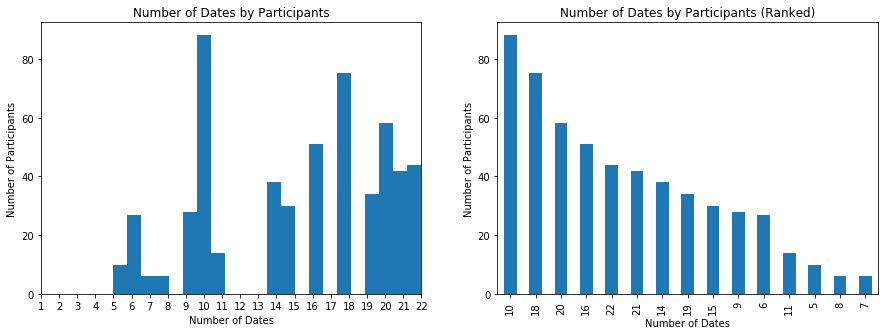

In [119]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
data_df.groupby(by="iid").mean()["round"].\
    plot(kind='hist', bins=22, xlim=(1,22), xticks=range(0,23))
plt.title("Number of Dates by Participants")
plt.ylabel("Number of Participants")
plt.xlabel("Number of Dates")

plt.subplot(1,2,2)
data_df.groupby(by="iid").mean()["round"].astype(int).value_counts().plot(kind='bar')
plt.title("Number of Dates by Participants (Ranked)")
plt.ylabel("Number of Participants")
plt.xlabel("Number of Dates")

plt.show()

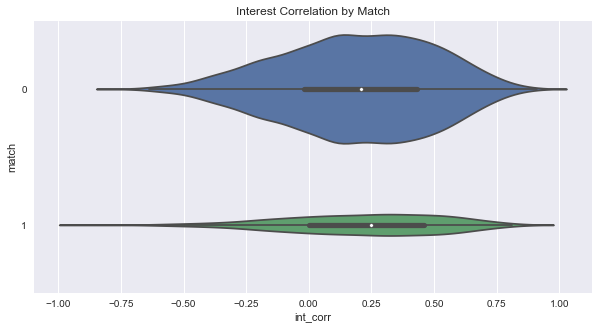

In [143]:
plt.figure(figsize=(10,5))

sns.violinplot(x="int_corr", y="match", data=data_male_df, scale="count", orient="h")
plt.title("Interest Correlation by Match")

plt.show()

In [192]:
data_male_df[data_male_df["match"] == 1].groupby(by="samerace")["iid"].count()

samerace
0    407
1    283
Name: iid, dtype: int64

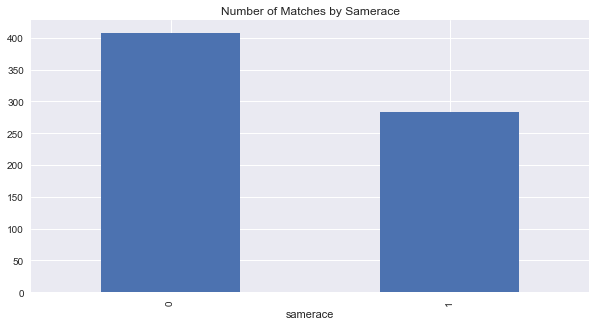

In [190]:
plt.figure(figsize=(10,5))

data_male_df[data_male_df["match"] == 1].groupby(by="samerace")["iid"].count().plot(kind="bar")
plt.title("Number of Matches by Samerace")

plt.show()

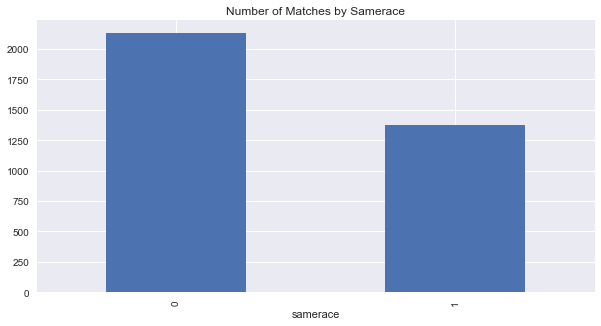

In [193]:
plt.figure(figsize=(10,5))

data_male_df[data_male_df["match"] == 0].groupby(by="samerace")["iid"].count().plot(kind="bar")
plt.title("Number of Matches by Samerace")

plt.show()

# Male Analysis

In [4]:
data_m_df = data_df[data_df["gender"] == 1]

In [5]:
features_to_use = [
    'match',\
    'age', 'go_out', 'sports',\
    'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',\
    'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy']

In [ ]:
X_df = data_m_df[features_to_use]


ValueError: array must not contain infs or NaNs

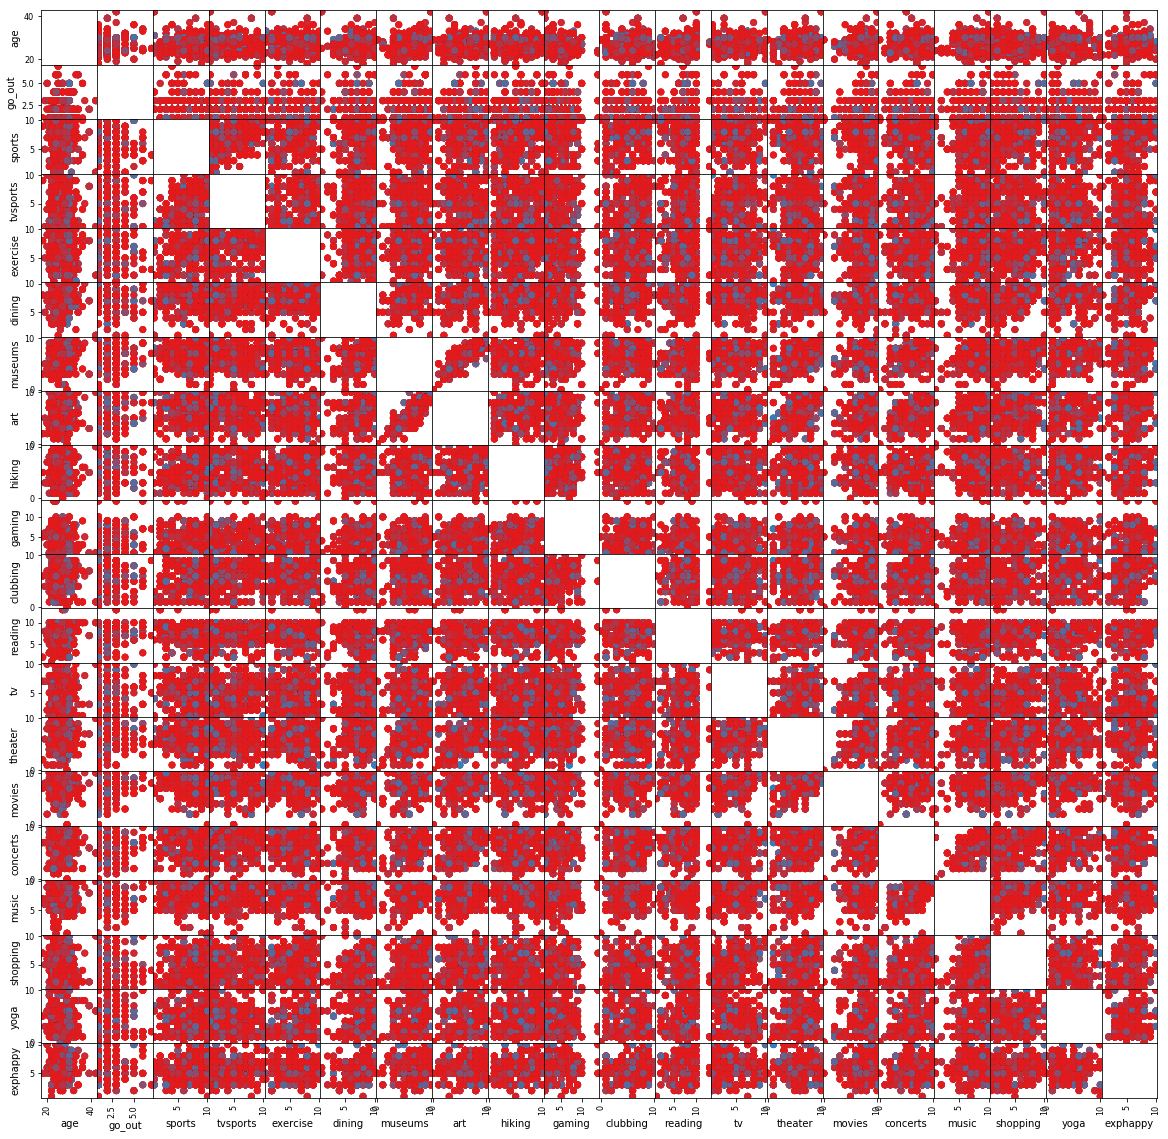

In [6]:
factor_scatter_matrix(data_m_df[features_to_use], "match", figsize=(20,20))
plt.show()

There are Nan values in both 'field' and 'field_cd', but there are some entries that 'field' is filled but with 'filed_cd' empty, so we convert them here

In [ ]:
print("Numer of ppl did not fill field:", sum(pd.isnull(data_df['field'])))
print("Numer of ppl did not fill field_cd:", sum(pd.isnull(data_df['field_cd'])))
print("Number of ppl did not fill career:", sum(pd.isnull(data_df['career'])))

# convert all filled field to field code
f_fcd = data_df[['field','field_cd']].drop_duplicates() # get all listed filed name and its code
nan_ind = pd.isnull(f_fcd).any(1).nonzero()[0] # row has Nan
f_fcd.drop(f_fcd.index[nan_ind],inplace=True) # remove rows that has Nan

fcd_ind = pd.isnull(data_df['field_cd']).nonzero()[0] # row where 'field_cd' is Nan
data_ind = data_df.index
n = 0
for i in fcd_ind:
    field_i = data_df.loc[data_ind[i], 'field']
    f_cd = f_fcd[f_fcd['field']==field_i]['field_cd'].values
    if pd.isnull(f_cd) == 0: # if the person did not leave 'field' empty
        n += 1
        data_df.loc[data_ind[i], 'field_cd'] = f_cd[0]
print("Done converting with {} filed_cd added!".format(n))

We will only use some relevant and avaliable features

In [ ]:
# note 'career_c' is incomplete and needs to add
# And also 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1' are not filled 
use_features = ['iid', 'gender', 'wave', 'pid', 'match', 'samerace', 'age_o', 'race_o', \
                 'pf_o_att', 'pf_o_sin', 'pf_o_int','pf_o_fun', 'pf_o_amb', 'pf_o_sha',\
                 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'sports',\
                 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',\
                 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',\
                 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1',\
                 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1','fun3_1', 'intel3_1', 'amb3_1']
Data_df = data_df[use_features]

The features 1_1, 2_1 are measured differently than 3_1, where former has the rule: "Waves 6-9: Please rate the importance of the following attributes on a scale of 1-10; Waves 1-5 and 10-21: Please distribute 100 points among the following attributes -- give more points to those attributes that you think are more important to members of the opposite sex when they are deciding whether to date someone. Total points must equal 100."

In [ ]:
# we will change the 100 pts measure to 1~10 scale
# First, get all the data where wave 1-5, 10-21 where people use pts measure
pts = Data_df[(Data_df['wave']>9)|(Data_df['wave']<6)]
pts_ind = pts.index
f1 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
f2 = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']
print(Data_df.loc[pts_ind,f1].max())
# however, some scale are written in pts
scale = Data_df[(Data_df['wave']<10)&(Data_df['wave']>5)]
print("However, somehow some entries that are supposed to be scale also use pts\n", scale[f1].max())
# by a closer look, we found that wave 6-9 also uses pts measure on f1 and f2 instead of 1-10 scale
scale_pts1 = scale[np.sum(scale[f1]>10,axis=1)==0]
scale_pts2 = scale[np.sum(scale[f2]>10,axis=1)==0]
print("The only one that is not in pts measure are those with Nan value")
scale_pts1[f1+f2]
# so we will just keep it as it is

build the vector that contains the information both for the male and female

In [ ]:
# first get rid off any rows contain Nan value
inds = pd.isnull(Data_df).any(1).nonzero()[0] # row index that contains Nan
print("number of rows contain Nan:", len(inds))
Data_df= Data_df.drop(Data_df.index[inds])
# notice pid is float, so we change it to int
Data_df['pid'] = Data_df['pid'].astype(int)
Data_df['iid'] = Data_df['iid'].astype(int)

mdata_df = Data_df[Data_df['gender']==1]
fdata_df = Data_df[Data_df['gender']==0]
print(mdata_df.shape)
print(fdata_df.shape)
same1 = []
for i in mdata_df.pid.values:
    if i not in fdata_df.iid.values:
        same1.append(i)
print("some guy's partener is not found in fdata:", list(set(same1)))
same2 = []
for i in fdata_df.pid.values:
    if i not in mdata_df.iid.values:
        same2.append(i)
print("some girl's partener is not found in mdata:", list(set(same2)))

# male features in combination
cmfeatures = ['iid', 'pid', 'match', 'samerace', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out',\
             'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',\
             'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',\
             'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1',\
             'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1','fun3_1', 'intel3_1', 'amb3_1']
new_mdata = mdata_df[cmfeatures]
# female features in combination
cffeatures = [cmfeatures[0]] + cmfeatures[4:]
new_fdata = fdata_df[cffeatures].drop_duplicates()
new_data = pd.DataFrame.copy(new_mdata)
new_fdata.columns = [i+'_f' for i in cffeatures] # rename the feature name of female

In [ ]:
print("building data for pairs...")
df = pd.DataFrame()
for i in new_mdata.index.values:
    m_info = new_mdata.loc[i,:]
    pid = new_mdata.loc[i,'pid'] # this is the (female)partener's ID
    f_ind = new_fdata.iid_f==pid
    if sum(f_ind) !=0: # append only if the pid is found in female iid
        f_info_df = new_fdata[f_ind]
        f_info = f_info_df.loc[f_info_df.index[0],:]
        combined = m_info.append(f_info)
        df = df.append(combined,ignore_index=True)
# now drop features that we do not need for prediction
drop_features = ['iid', 'pid', 'iid_f']
print("Done making data for pairs")
pair_df = df.drop(drop_features,axis=1)
pair_df.head()

In [ ]:
pair_df.columns

Now let us build the model, first, and see the number of each class(0 = no, 1 = yes)

In [ ]:
pair_train = pair_df.drop('match',axis=1)
pair_label = pair_df['match']
print("total training data size:", pair_df.shape)
pd.Series.value_counts(pair_label)

we will use a tuned xgb model

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV   #Performing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 22, 4

from time import time

# create train and test data
train_data, test_data = train_test_split(pair_df, test_size=0.1, random_state=42, stratify=pair_df['match'])
predictors = [x for x in pair_df.columns if x not in ['match']]
print("train shape:", train_data.shape)
print("test shape:", test_data.shape)

### Train our model!

(see details :http://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [ ]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=20):
    t1 = time()
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['match'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=['auc'], early_stopping_rounds=early_stopping_rounds, stratified=True)#, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['match'],eval_metric=['auc'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    #Predict test set:
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
    
    t2 = time()    
    #Print model report:
    print("\nModel Report (took {0:.2f}sec)".format(t2-t1))
    print("The result params is:\n", alg.get_xgb_params())
    print("Train Accuracy: {0:.2f}%".format(metrics.accuracy_score(dtrain['match'].values, dtrain_predictions)))
    print("Train AUC Score: {0:.4f}".format(metrics.roc_auc_score(dtrain['match'], dtrain_predprob)))
    print("Test Accuracy: {0:.2f}%".format(metrics.accuracy_score(dtest['match'].values, dtest_predictions)))
    print("Test AUC Score: {0:.4f}".format(metrics.roc_auc_score(dtest['match'], dtest_predprob)))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    return dtest_predprob, feat_imp

In [ ]:
clf = XGBClassifier(learning_rate =0.01,
                     n_estimators=5000,
                     max_depth=5,
                     min_child_weight=6,
                     gamma=0.4,
                     subsample=0.95,
                     colsample_bytree=0.65,
                     reg_alpha=0.,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27)
result = modelfit(clf, train_data, test_data, predictors)

First 10 important features: (importance in descending order)

In [ ]:
print(result[1].index.values[:10])

Least 10 important features: (importance in ascending order)

In [ ]:
print(list(result[1].index.values[-10:])[::-1])

### Plot ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
rcParams['figure.figsize'] = 10, 8
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_data['match'], result[0])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

see more about auc_roc: https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/ and http://gim.unmc.edu/dxtests/roc3.htm